In [1]:
import schemdraw
import schemdraw.elements as elm
from schemdraw import flow
from schemdraw import dsp
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 18

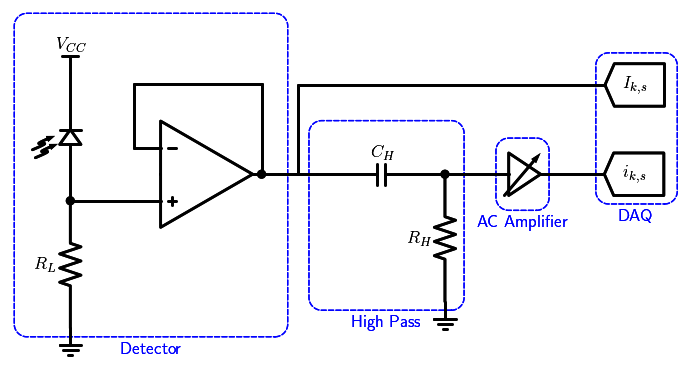

In [3]:
with schemdraw.Drawing() as d:
    d += (voltage := elm.Vdd().label(r"$V_{CC}$"))
    d += (diode := elm.Photodiode().down().flip().reverse()).dot()
    d.push()
    d += (resistor := elm.Resistor().down().label("$R_{L}$"))
    d += elm.Ground()
    d.pop()
    d += elm.Line().right(d.unit / 2)
    d += (op := elm.Opamp(leads=True).right().anchor("in2"))
    d.push()
    d += (detector := elm.EncircleBox([voltage, diode, resistor, op]).linestyle('--').linewidth(1).color('blue')).label("Detector", loc="bottom")
    d += elm.Line().up(d.unit / 2).at(op.in1)
    d += elm.Line().right()
    d += elm.Line().toy(op.out).dot()

    """"DC Signal"""
    d.pop()
    d += elm.Line().at(op.out).right(0.15 * d.unit)   # The wire is only the get a little gap between the boxes",
    d += elm.Line().right().toy(op.out)
    d += elm.Line().up(0.7 * d.unit)
    d += (wire := elm.Line().right(2.405 * d.unit))
    d += (dc_adc := dsp.Adc().label("$I_{k, s}$"))

    """High Pass"""
    d += elm.Line().at(op.out).right(0.3 * d.unit)   # The wire is only the get a little gap between the boxes",
    d += (C := elm.Capacitor().label("$C_{H}$")).dot()
    d.push()
    d += (R := elm.Resistor().down().label("$R_H$"))
    d += elm.Ground()
    d += (detector := elm.EncircleBox([R, C]).linestyle('--').linewidth(1).color('blue')).label("High Pass", loc="bottom")

    """AC Amplifier"""
    d.pop()
    d += elm.Line().right(d.unit / 2)
    d += elm.Line().toy(op.out).right()
    d += (amplifier := dsp.VGA().right())
    d += elm.Line().right(d.unit / 2)
    d += (ac_adc := dsp.Adc().label("$i_{k, s}$"))
    d += (detector := elm.EncircleBox([amplifier]).linestyle('--').linewidth(1).color('blue')).label("AC Amplifier", loc="bottom")

    """DAQ"""
    d += (daq := elm.EncircleBox([dc_adc, ac_adc]).linestyle('--').linewidth(1).color('blue')).label("DAQ", loc="bottom")
    d.save("circuit.pdf")


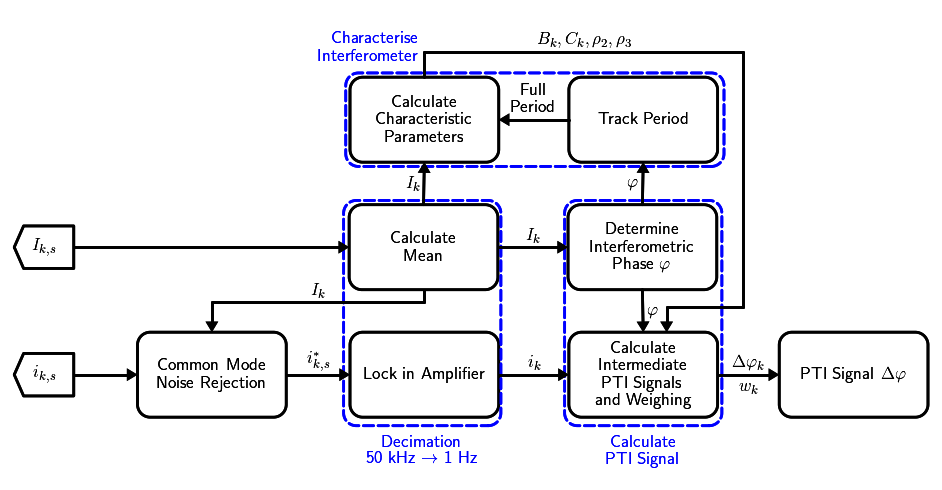

In [4]:
with schemdraw.Drawing() as d:
    """DC Signals"""
    d += dsp.Adc().label("$I_{k, s}$").at((0, 0))
    d += (dc := flow.Arrow(headwidth=0.3).right(2.16 * d.unit))
    d += (ac1 := dsp.Adc().label("$i_{k, s}$").at((0, -3)))
    d += (low_pass := flow.RoundBox(w=3.5, h=2)).label("Calculate\nMean").at(dc.end)
    d += flow.Arrow(headwidth=0.3).right(0.55 * d.unit).label("$I_{k}$")
    d.push()
    d.push()

    """AC Signals"""
    d += (ac := flow.Arrow(headwidth=0.3).right(d.unit/2)).at(ac1.E)
    d += (cmnr := flow.RoundBox(w=3.5, h=2)).label("Common Mode\nNoise Rejection").at(ac.end)
    d.push()
    d += flow.Arrow(headlength=0).at(low_pass.S).down(0.1 * d.unit)
    d += flow.Arrow(headlength=0).label("$I_{k}$").left(1.66 * d.unit)
    d += flow.Arrow(headwidth=0.3).to(cmnr.N)
    d.pop()
    d += flow.Arrow(headwidth=0.3).right(d.unit/2).label("$i_{k, s}^*$")
    d += (lock_in := flow.RoundBox(w=3.5, h=2)).label("Lock in Amplifier")
    d.push()

    """PTI Signal"""
    d.pop()
    d += (pti_single := flow.RoundBox(w=3.5, h=2)).label("Calculate\nIntermediate\nPTI Signals\nand Weighing").at((13.05, -3))
    d += (pti_signal := flow.RoundBox(w=3.5, h=2)).label(r"PTI Signal $\Delta \varphi$").at((18, -3))
    d += flow.Arrow(headwidth=0.3).at(lock_in.E).right(0.55 * d.unit).label(r"$i_{k}$")
    d += flow.Arrow(headwidth=0.3).label(r"$\Delta \varphi_k$", loc="top").label(r"$w_k$", loc="bottom").at(pti_single.E).to(pti_signal.W)
    d.pop()
    d += (phase := flow.RoundBox(w=3.5, h=2,)).label("Determine\nInterferometric\nPhase " + r"$\varphi$")
    d += flow.Arrow(headwidth=0.3).at(phase.S).to(pti_single.N).label(r"$\varphi$")
    
    """Phase Scan"""
    d += (phase_scan := flow.RoundBox(w=3.5, h=2,)).label("Calculate\nCharacteristic\nParameters").at((9.65, 4))
    d += (tracking := flow.RoundBox(w=3.5, h=2,)).label("Track Period").at((14.8, 4))
    d += flow.Arrow(headwidth=0.3).label(r"$\varphi$").at(phase.N).to(tracking.S)
    d += flow.Arrow(headwidth=0.3).label("Full\nPeriod").at(tracking.W).to(phase_scan.E)
    d += flow.Arrow(headwidth=0.3).at(low_pass.N).to(phase_scan.S).label("$I_k$")
    d += flow.Arrow(headlength=0).at(phase_scan.N).up(0.2 * d.unit)
    d += flow.Arrow(headlength=0).right(2.5 * d.unit).label(r"$B_k, C_k, \rho_2, \rho_3$")
    d += flow.Arrow(headlength=0).down(2 * d.unit)
    d += flow.Arrow(headlength=0).left(0.6 * d.unit)
    d += flow.Arrow(headwidth=0.3).down(0.2 * d.unit)

    """Boxes"""
    d += flow.RoundBox(w=3.7, h=5.3, color="blue", linestyle='dashed').at((9.6, 1.1)).label("Decimation\n50 kHz" r" $\rightarrow$ 1 Hz",
                                                                                            loc="bottom", ofst=(0, -0.2)).linestyle("--")
    d += flow.RoundBox(w=8.9, h=2.2, color="blue", linestyle='dashed').at((12.25, 4.1)).label("Characterise\nInterferometer",
                                                                                             loc="left", ofst=(1.7, 1.7)).linestyle('--')
    d += flow.RoundBox(w=3.7, h=5.3, color="blue", linestyle='dashed').at((14.8, 1.1)).label("Calculate\nPTI Signal", loc="bottom",
                                                                                             ofst=(0, -0.2)).linestyle('--')
    
    d.save("flowchart.pdf")
